# <center>House Price Prediction: Solutions from Linear Regression Model</center>
<br>
<center>ZENG Shuman 1155160734</center>
<br>
<center>Tools：Python + Jupyternotebook + VsCode</center>

*Structure*<br><br>
**0 Problem statement**<br>
**1 Descriptive statistical**<br>
 1.1 Basic Information<br>
 1.2 Correlation matrix<br>
**2 Data processing** <br>
 2.1 Missing value<br>
 2.1 Data transformation<br>
**3 Feature engineering**<br>
 3.1 Top10 correlation matrix<br>
 3.2 Dealing with Outliers  <br>
 3.3 Categorical variables transformation<br>
**4 Model evaluation**<br>
 4.1 Linear Regression Model<br>
 4.2 Lasso Regression Model<br>
 4.3 Ridge regression Model<br>
**5 Conclusion**<br>
**6 Reference**<br>
**7 Appendix**<br>

**0.	Problem Statement**<br>
When considering to buy a house, the house price plays an important role in deciding whether to buy it. Then we may wonder whether the house price is appropriate or not？To answer this question, we are supposed to know what factors will influence the house price. We may consider many conditions such as the area, location, transport convenience, the quality of building and so on. Therefore, this essay would like to discuss the importance of factors which will affect the house price and how can we build a model to predict the house price? And the predicting result could be a reference comparing with the real sale price of the house.
<br>
<br>
Data source: Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)
<br>


**1.	Descriptive statistical**
<br>
In the first stage, I started from dealing with the problem by having a good understanding of the dataset downloaded from Kaggle, which focused on the descriptive statistical part.
<br>
**1.1 Basic information**
<br>
First of all, in order to better understand the dataset, the variable should be well clarified. The dataset is collected from Kaggle. The dependent variable is ‘SalePrice’, which is the target I should make a prediction. According to the dataset, there are totally 78 independent variables which could be divided into two groups, namely numerical variable and categorical variable. The data types also vary from ‘float64(11)’, ‘int64(26)’ to ‘object(43)’.
<br>
And each variable is clarified in the appendix file.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import skew
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**1.2 Correlation matrix**
<br>
As we know, in this dataset, ‘SalePrice’ is the dependent variable for what we want to predict. And the rest of variables are regarded as independent variables. Thus, it’s important to learn the correlation between them. Here I utilized a correlation matrix with heatmap visual style to clarify the relationship.


(<Figure size 864x720 with 2 Axes>, Text(0.5, 1.0, 'Correlation Matrix'))

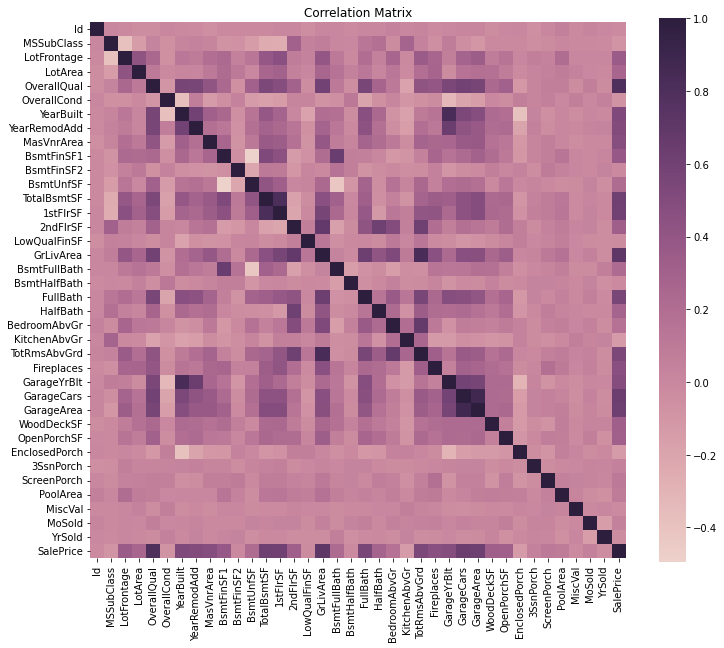

In [5]:
# Correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, cmap=sns.cubehelix_palette(as_cmap=True),square=True)
f,ax.set_title("Correlation Matrix")

According to Figure 1, we can learn:
1. OverallQual is highest related to SalePrice. The house price would increase as the quality of the house gets better.
2. GrLivArea is related to location, which illustrates the natural environment plays an important role in deciding the house price.
3. GarageCars and GarageArea also show high correlation with SalePrice. Despite that, these two variables are also highly correlated with each other, which shows a tendency of collinearity. Thus, these two variables should be regarded as one variable and then delete one of them, otherwise, it would affect the accuracy of the prediction.
<br>In summary, there are totally 79 variables in the dataset. As can be seen from the result of correlation matrix (Figure.1), variables such as 'OverallQual', 'YearBuuilt', 'GrLivArea' are highly correlated to 'SalePrice'. However, there are some variables showing low correlation at the same time such as 'KitchenAbvGr', ‘EnclosedPorch’, ’OverallCond’ and so on, which are not supposed to be taken into consideration. Therefore, a more accurate correlation matrix should be created.


**2.	 Data processing**
<br>
  Before we can get further insights from the data, it is supposed be to processed by dealing with the missing values, converting the categorical variables and so on.


**2.1 missing value**
<br>
In order to have a full picture of the missing values in the dataset, a visual bar chart could help to illustrate.


<AxesSubplot:>

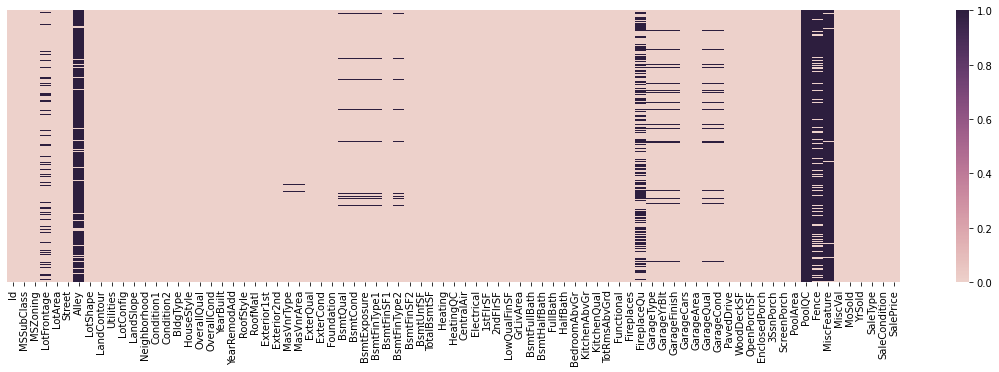

In [6]:
# 2.1 visualizing missing values
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_train.isnull(), yticklabels=False,cmap=sns.cubehelix_palette(as_cmap=True))

In [7]:
# 2.1 Percentage of missing values
total = df_train.isnull().sum().sort_values(ascending=False)
ratio=df_train.isnull().sum()/len(df_train)*100
missing_data = pd.concat([total,ratio],axis=1,keys = ['Total','Ratio'])
missing_data.head(40)

,Total,Ratio
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In terms of the results, more than 80 percent of data from variables ‘PoolQC’, ’MiscFeature’, ‘Alley’, ’Fence’ had lost, which could highly affect the accuracy of results if these variables are included into the predicting model. Moreover, the valid data from ‘FireplaceQu’ and ‘LotplaceQu’ are less than 85 percent, which should be eliminated from the dataset too. It’s proved that data with a missing value of more than 15% are considered invalid. Thus, according to the result, 'PoolQC', 'MiscFeature', 'Alley', 'Fence', ‘LotplaceQu’ and 'FireplaceQu' are supposed to be removed. Additionally, variable of ‘Electrical’ just has one column of missing value according to the result, which could be simply deleted. 

In [8]:
# 2.1 dealing with the missing data
# Deleting the rows containing large proportion of missing values.
data_delete = df_train.drop(missing_data[missing_data['Total']>=8].index,axis=1)
# Deleting the two missing points of 'Electrical'
data_clean = data_delete.drop(data_delete.loc[data_delete['Electrical'].isnull()].index)
data_clean.isnull().sum().max()
data_clean.shape
data_clean.head(10)
print(data_clean)


        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

**2.2 Data transformation**

As can be seen from the result below (price), the value of ‘SalePrice’ shows a right skewed tendency, which needs to be fixed.
<br>
In order to make the feature more normal to better fit in the prediction model, here I deal with the data by taking log transformation (log_price). After the transformation, the data below shows a normal distribution, which will reduce errors in the prediction model. 

array([[<AxesSubplot:title={'center':'log_price'}>]], dtype=object)

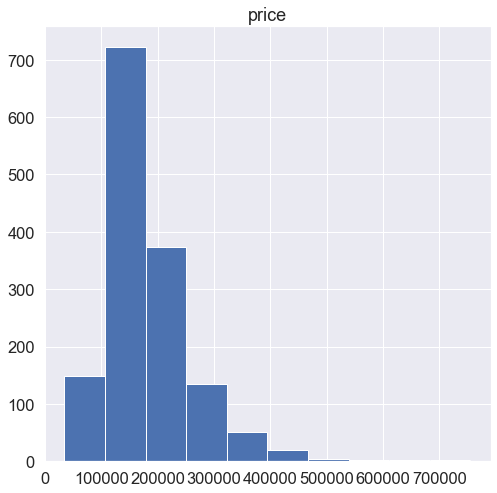

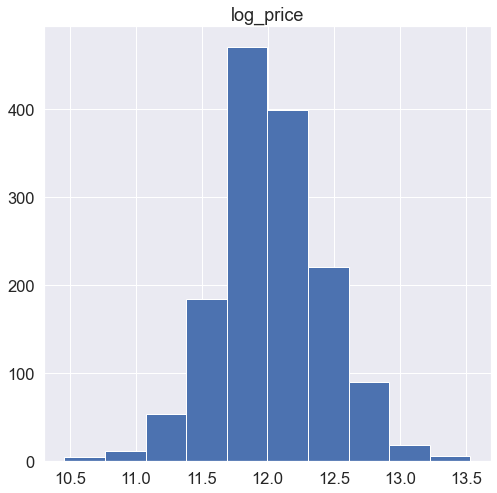

In [10]:
# 2.2 Data transformation
# log transformation
prices = pd.DataFrame({'price':data_clean["SalePrice"]})
TransformPricelog=pd.DataFrame({'log_price':np.log1p(data_clean["SalePrice"])})
data_clean["SalePrice"] = np.log1p(data_clean["SalePrice"])
# before
prices.hist(figsize=(8, 8))
# after
TransformPricelog.hist(figsize=(8, 8))


In [11]:
# 2.2 Data transformation
# In addition, the rest of data belongs to ‘object’ also would be processed by ‘log transformation’.
# log transform skewed numeric features:
numeric_feats = data_clean.dtypes[data_clean.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data_clean[skewed_feats] = np.log1p(data_clean[skewed_feats])

**3.	Feature engineering**
<br>
After processing the data roughly, followed step is to observe the correlation and obtain the important feature variables via correlation matrix.


**3.1 Correlation again: Top10 correlation matrix**
<br>
As mentioned above, a more detailed correlation should be examined in this stage. Thus, the correlation matrix with top 10 correlation coefficient is shown as follows.


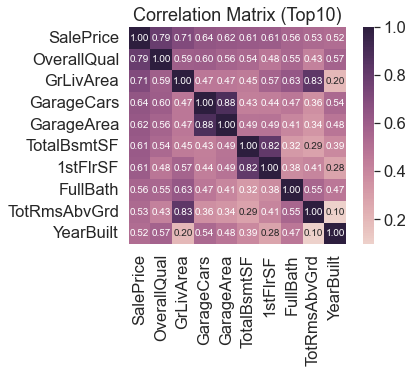

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [12]:
# 3.1 top10 correlation matrix
N = 10
cols = corrmat.nlargest(N,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True, annot=True, square=True, fmt='0.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm.set_title("Correlation Matrix (Top10)")
plt.show()
print(corrmat)
print(hm)

According to the figure of correlation matrix (Top10), we can learn the variables which are most related to 'SalePrice':
1.	'OverallQual (0.79)' is highest related to 'SalePrice'.
2.	Followed is 'GrLivArea (0.71)', which illustrates the significance of natural environment in deciding the house price.
3.	'GarageCars' and 'GarageArea' both show high correlation with 'SalePrice (0.64/0.62)', but the correlation between these two variables is also high (0.88). In order to avoid the collinearity, ‘GarageArea’ would be removed.
4.	'TotalBsmtSF' and '1stFlrSF' seem have the same value of the correlation coefficient (0.61) with ‘SalePrice’. Meanwhile, ‘TotalBsmtSF’ and ‘1stFlrSF’ are highly correlated with each other, and here ‘1stFlrSF’ is removed.
5.	It's interesting that 'FullBath (0.56)' is slightly correlated with 'SalePrice' here. Because 'FullBath' means full bathrooms above grade in the house and I don’t figure out why it is important.
6.	'TotRmsAbvGrd' is highly correlated to 'GrLivArea'(0.83), which should also be removed in order to avoid the collinearity.
7.	'YearBuild (0.52)' also shows slight correlation with 'SalePrice'. In reality, people would consider the construction date of the house, which could affect the house price.


**3.2 Dealing with Outliers**
<br>
First, I am dealing with the outliers from feature variable ‘GrLivArea’. As can be seen from the chart below, there are two outlier points in the bottom-right corner, which should be deleted. 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

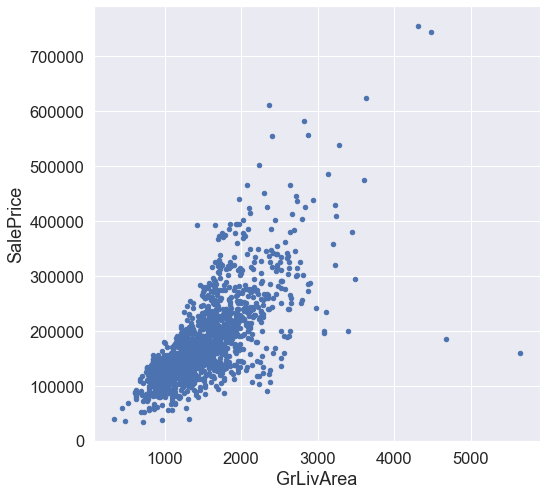

In [13]:
# 3.2 Remove the outliars
var1 = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var1]], axis=1)
data.plot.scatter(x=var1, y='SalePrice',figsize=(8, 8))
# By plotting the picture below, we can clearly find where the outliars are.

In [14]:
# 3.2 Remove the outliars
# According to the chart shown above, there are two points should be removed.
drop_points=data_clean.sort_values(by='GrLivArea',ascending=False)[:2]["GrLivArea"]
drop_points_list=drop_points.index.tolist()
data_clean.drop(drop_points_list,inplace=True)
print(data_clean)

        Id  MSSubClass MSZoning   LotArea Street LotShape LandContour  \
0        1    4.110874       RL  9.042040   Pave      Reg         Lvl   
1        2    3.044522       RL  9.169623   Pave      Reg         Lvl   
2        3    4.110874       RL  9.328212   Pave      IR1         Lvl   
3        4    4.262680       RL  9.164401   Pave      IR1         Lvl   
4        5    4.110874       RL  9.565284   Pave      IR1         Lvl   
...    ...         ...      ...       ...    ...      ...         ...   
1455  1456    4.110874       RL  8.976894   Pave      Reg         Lvl   
1456  1457    3.044522       RL  9.486152   Pave      Reg         Lvl   
1457  1458    4.262680       RL  9.109746   Pave      Reg         Lvl   
1458  1459    3.044522       RL  9.181735   Pave      Reg         Lvl   
1459  1460    3.044522       RL  9.204121   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...     

In [15]:
data_clean.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,RL,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.000000,0.0,0.0,0.000000,2,2008,WD,Normal,2.583824
1,2,3.044522,RL,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.000000,5,2007,WD,Normal,2.573300
2,3,4.110874,RL,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0.000000,0.0,0.0,0.000000,9,2008,WD,Normal,2.589054
3,4,4.262680,RL,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5.609472,0.000000,0.0,0.0,0.000000,2,2006,WD,Abnorml,2.553297
4,5,4.110874,RL,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.000000,12,2008,WD,Normal,2.597433
5,6,3.931826,RL,9.555064,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,5.771441,0.0,0.0,6.552508,10,2009,WD,Normal,2.554946
6,7,3.044522,RL,9.218804,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.000000,0.0,0.0,0.000000,8,2007,WD,Normal,2.612611
7,8,4.110874,RL,9.247925,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5.433722,0.000000,0.0,0.0,5.860786,11,2009,WD,Normal,2.580677
8,9,3.931826,RM,8.719481,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,5.327876,0.000000,0.0,0.0,0.000000,4,2008,WD,Abnorml,2.547453
9,10,5.252273,RL,8.912069,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.000000,0.000000,0.0,0.0,0.000000,1,2008,WD,Normal,2.539904


**3.3 Categorical variables transformation**
<br>
As mentioned before, there are several categorical variables among the feature variables I picked. Thus, in this step, I will transform these categorical data into numerical format by using the ‘get_dummies()’ method of python.
Finally, I get a prepared dataset with 1092 rows and 221 columns.


In [16]:
data_clean=pd.get_dummies(data_clean)
data_clean.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,9.042040,7,5,2003,2003,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,9.169623,6,8,1976,1976,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,9.328212,7,5,2001,2002,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,9.164401,7,5,1915,1970,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,9.565284,8,5,2000,2000,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0


In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 221 entries, Id to SaleCondition_Partial
dtypes: float64(20), int64(15), uint8(186)
memory usage: 674.4 KB


**4.	Model**
<br>
Before put the data to train the prediction model, here I employ ‘Sklearn’ package from python to spilt the dataset into training dataset (70%) and testing dataset (30%). 
<br>
<br>
Since it is the first time for me to complete a data science project individually, I would like to try something simple. Following are the prediction models which I can handle with. Firstly, I am going to use linear regression models from the scikit learn module. Then, I am planning to try both Lasso and Ridge regression models which belong to regularized linear regression model. 



In [18]:
#Spilt the dataset into train dataset and test dataset:
from sklearn.model_selection import train_test_split
X= data_clean.drop('SalePrice',axis=1)
y = data_clean.SalePrice
X_train,X_test,y_train,y_test= train_test_split(X, y,test_size = 0.30, random_state = 45)
X_train.shape

(1019, 220)

**4.1 Linear regression model**

In [19]:
# Test Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Linearregression")
print ("training set score:{:.2f}".format(lr.score(X_train,y_train)))
print ("test set score:{:.2f}".format(lr.score(X_test,y_test)))
print ("Number of features used:{}".format(np.sum(lr.coef_!=0)))

Linearregression
training set score:0.95
test set score:0.90
Number of features used:220


According to the first linear regression model, we can learn:
The train score of linear regression model is 0.95, 0.05 higher than the test score (0.90), with 220 features selected. Overall, the linear regression model performs well in the dataset.


**4.2 Lasso regression model**

In [20]:
from sklearn.linear_model import Ridge, Lasso
# Three lasso regression models were built by setting different alpha values below:
lasso_01 = Lasso(alpha=0.1, normalize=True).fit(X_train, y_train)
lasso_0005 = Lasso(alpha=0.0005, normalize=True).fit(X_train, y_train)
lasso_0001 = Lasso(alpha=0.0001, normalize=True).fit(X_train, y_train)


print("Lasso alpha=0.1")
print ("training set score:{:.2f}".format(lasso_01.score(X_train,y_train)))
print ("test set score:{:.2f}".format(lasso_01.score(X_test,y_test)))
print ("Number of features used:{}".format(np.sum(lasso_01.coef_!=0)))

print('**********************************')
print("Lasso alpha=0.0005")
print ("training set score:{:.2f}".format(lasso_0005.score(X_train,y_train)))
print ("test set score:{:.2f}".format(lasso_0005.score(X_test,y_test)))
print ("Number of features used:{}".format(np.sum(lasso_0005.coef_!=0)))

print('**********************************')
print("Lasso alpha=0.0001")
print ("training set score:{:.2f}".format(lasso_0001.score(X_train,y_train)))
print ("test set score:{:.2f}".format(lasso_0001.score(X_test,y_test)))
print ("Number of features used:{}".format(np.sum(lasso_0001.coef_!=0)))




Lasso alpha=0.1
training set score:0.00
test set score:-0.00
Number of features used:0
**********************************
Lasso alpha=0.0005
training set score:0.41
test set score:0.40
Number of features used:2
**********************************
Lasso alpha=0.0001
training set score:0.85
test set score:0.84
Number of features used:12


**4.3 Ridge regression model**

In [21]:
ridge_1 = Ridge(alpha=1).fit(X_train,y_train)
print("Ridege alpha=1")
print ("training set score:{:.2f}".format(ridge_1.score(X_train,y_train)))
print ("test set score:{:.2f}".format(ridge_1.score(X_test,y_test)))
print ("Number of features used:{}".format(np.sum(ridge_1.coef_!=0)))

Ridege alpha=1
training set score:0.95
test set score:0.91
Number of features used:214


According to the Ridge regression model, we can learn:
<br>
When Alpha is equal to 1, the train score of ridge model is 0.95, which is sightly higher than the test score (0.91), with 214 features included.


In summary, the **Linear regression model** (Train score=0.95;Test score=0.90) and the **Ridge regression model** (Alpha=1; Train score=0.95; Test score=0.91) seems perform better compared to the remains.

**5.	Conclusion**
1.	When deal with the missing values, I focused on them without further optimization, such as making the dataset more complete by adding the mean or the mode. There is still room for more progress.
2.	As for this project, the Linear regression model is used, and although the results are acceptable, the model is too simple to be realistic. In the future, I need to try to use other models for validation.
3.	Although I didn’t handle with the feature engineering well in the project, I have learned something from the process: When a variable is found to be useful for the goal to be accomplished, it can be employed as a feature for the model. Thus, as many features as possible should be generated at first, and then the prediction model can pick out the most useful ones, which is a continuous process.
4.	Last but not least, in the process of analyzing data and visualizing data, my python skills have been improved a lot. In addition, I also realize that python is a useful tool with great power. But only when I learn the basic knowledge such as data processing and data visualization well, can I utilize it better.


**Reference**
<br>
基于sklearn的Lasso实现与效果分析. (2018, May 23). Blog.csdn.net. https://blog.csdn.net/weixin_41500849/article/details/80425110



**Appendix**
<br>
(Attached to the GitHub)